# 🔎 Análisis exploratorio del dataset Madrid Polution (2001- 2022)

Este proyecto utiliza el dataset “MadridPolution2001-2022.csv”, que contiene registros horarios de contaminantes atmosféricos medidos en la estación Escuelas Aguirre (Madrid) desde enero de 2001 hasta marzo de 2022. El objetivo principal es analizar la evolución de la calidad del aire en Madrid, identificando tendencias, picos y patrones estacionales en los principales contaminantes.

El dataset incluye las siguientes variables:
- **BEN**: Benceno (µg/m³)
- **CH4**: Metano (mg/m³)
- **CO**: Monóxido de carbono (mg/m³)
- **EBE**: Etilbenceno (µg/m³)
- **NMHC**: Hidrocarburos no metánicos (mg/m³)
- **NO**: Monóxido de nitrógeno (µg/m³)
- **NO2**: Dióxido de nitrógeno (µg/m³)
- **NOx**: Óxidos de nitrógeno (µg/m³)
- **O3**: Ozono (µg/m³)
- **PM10**: Partículas < 10 µm (µg/m³)
- **PM25**: Partículas < 2.5 µm (µg/m³)
- **SO2**: Dióxido de azufre (µg/m³)
- **TCH**: Hidrocarburos totales (mg/m³)
- **TOL**: Tolueno (µg/m³)

El análisis se centra en la evolución temporal, la comparación entre contaminantes y la identificación de patrones estacionales y extremos. Se proponen mejoras en los ejercicios para aprovechar la riqueza temporal y de variables del nuevo dataset.

In [58]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
csv_path = r"data/MadridPolution2001-2022.csv"

# Leer sin parsear fechas inicialmente para detectar el nombre de columna correcto
df = pd.read_csv(csv_path)

print("Columnas detectadas en el CSV:", df.columns.tolist())

# Buscar columna de fecha independientemente de mayúsculas/minúsculas
date_col = next((c for c in df.columns if c.lower() in ("date", "fecha", "datetime", "timestamp", "time", "date_time")), None)
if date_col is None:
    # intentar encontrar una columna que contenga 'date' en su nombre
    date_col = next((c for c in df.columns if "date" in c.lower()), None)

if date_col is None:
    raise ValueError(f"No se encontró una columna de fecha en {csv_path}. Columnas: {df.columns.tolist()}")

# Convertir a datetime (usar errors='coerce' para evitar excepción por formatos inesperados)
df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")

# Renombrar la columna de fecha a 'date' para homogeneidad
if date_col != "date":
    df = df.rename(columns={date_col: "date"})

# Mostrar información general
print("Dimensiones del dataset:", df.shape)
print("Columnas:", df.columns.tolist())
display(df.head())

# Asegurar que la columna 'date' esté en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df["date"]):
    df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# Añadir columnas de año, mes, día y hora para análisis temporales
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

Columnas detectadas en el CSV: ['Time', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL']
Dimensiones del dataset: (172622, 15)
Columnas: ['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL']


,date,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
0,2001-01-01 00:00:00+00:00,4.0,NaN,0.0,2.0,NaN,66.0,67.0,168.0,7.0,32.0,NaN,26.0,NaN,11.0
1,2001-01-01 01:00:00+00:00,9.0,NaN,0.0,5.0,NaN,146.0,71.0,294.0,7.0,41.0,NaN,21.0,NaN,21.0
2,2001-01-01 02:00:00+00:00,9.0,NaN,0.0,5.0,NaN,190.0,73.0,364.0,7.0,50.0,NaN,22.0,NaN,24.0
3,2001-01-01 03:00:00+00:00,10.0,NaN,0.0,5.0,NaN,170.0,75.0,335.0,7.0,55.0,NaN,19.0,NaN,25.0
4,2001-01-01 04:00:00+00:00,8.0,NaN,0.0,4.0,NaN,102.0,67.0,224.0,8.0,42.0,NaN,14.0,NaN,21.0


## 📊 Robert (análisis general y descriptivo)

- Promedio anual: ¿Cuál es la concentración media de cada contaminante por año? (tabla resumen por año y contaminante).
- Mejora: Visualizar la evolución anual de los principales contaminantes con gráficos de líneas.


,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
año,,,,,,,,,,,,,,
2001.0,4.33,NaN,0.54,3.39,NaN,82.52,71.67,198.20,26.07,36.57,NaN,12.97,NaN,14.21
2002.0,NaN,1.05,0.80,NaN,0.00,132.92,77.72,281.53,13.39,37.93,NaN,21.44,1.16,NaN
2003.0,1.02,1.01,0.34,1.41,0.00,75.78,75.10,191.30,29.03,32.04,NaN,15.42,1.04,9.25
2004.0,0.69,1.01,0.25,1.22,0.00,72.89,74.11,185.86,28.16,33.23,NaN,14.38,1.03,8.54
2005.0,0.20,1.01,0.16,0.87,0.00,62.61,77.50,173.49,29.26,31.31,NaN,13.99,1.06,3.42
2006.0,0.06,0.88,0.08,0.34,0.00,59.66,73.36,164.82,30.57,40.77,NaN,12.24,1.02,3.76
2007.0,0.56,0.98,0.13,1.14,0.02,67.30,70.04,173.22,28.77,35.88,NaN,13.33,1.06,6.96
2008.0,0.13,0.96,0.03,0.64,0.00,37.84,61.61,119.63,31.08,26.29,NaN,11.22,1.02,4.77
2009.0,0.18,1.01,0.02,0.71,0.00,37.34,51.99,109.23,40.21,27.54,14.56,11.97,1.02,4.53


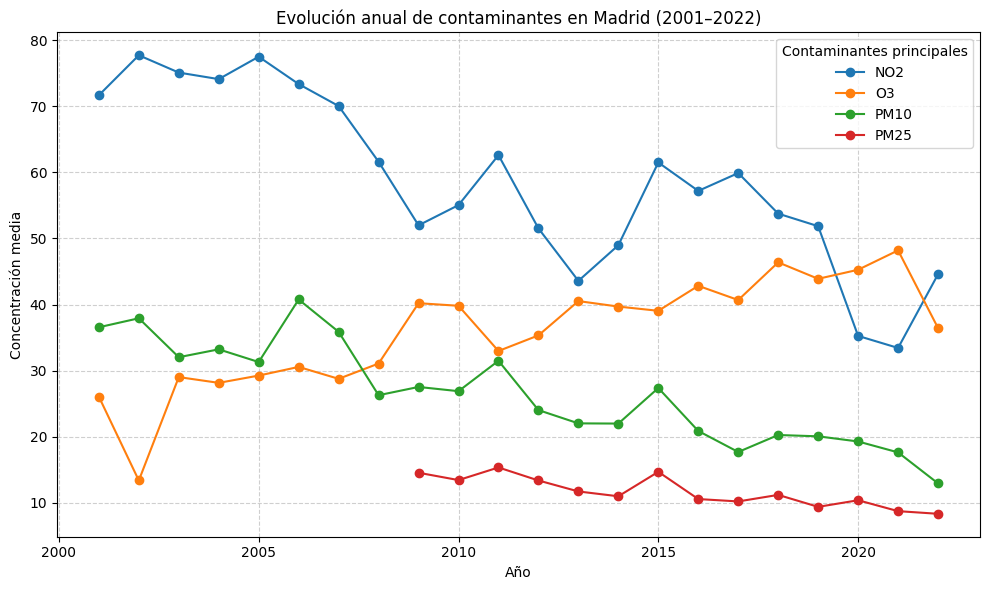

In [59]:
# Agrupamos todos los datos en años, pasando de 2001-01-01 00:00:00+00:00 a los años correspondientes
df["año"] = df["date"].dt.year

# Creamos una lista con todos los contaminantes que se recogen
contaminantes = ["BEN","CH4","CO","EBE","NMHC","NO","NO2","NOx","O3","PM10","PM25","SO2","TCH","TOL"]

# Agrupamos todos los datos de todos los contaminantes en años y entre todos los datos sacamos su media correspondiente
resumen = df.groupby("año")[contaminantes].mean().round(2)

# Mostramos los datos
display(resumen)

# Para la mejora de este apartado, creamos una lista con la selección de los principales contaminantes
principales = ["NO2", "O3", "PM10", "PM25"]

# Filtrar el resumen solo a esos contaminantes
resumen_principales = resumen[principales]

# Creamos el gráfico y lo mostramos
plt.figure(figsize=(10,6))
for col in resumen_principales.columns:
    plt.plot(resumen_principales.index, resumen_principales[col], marker="o", label=col)

plt.title("Evolución anual de contaminantes en Madrid (2001–2022)")
plt.xlabel("Año")
plt.ylabel("Concentración media")
plt.legend(title="Contaminantes principales")
# Mostramos el gráfico con delimitadores para mayor visibilidad
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

- Mes con peor calidad del aire: ¿Qué mes tuvo la media más alta de NO₂ cada año? (gráfico de barras mensual por año).
- Mejora: Mostrar el mes más crítico para cada año y visualizar la tendencia mensual agregada.

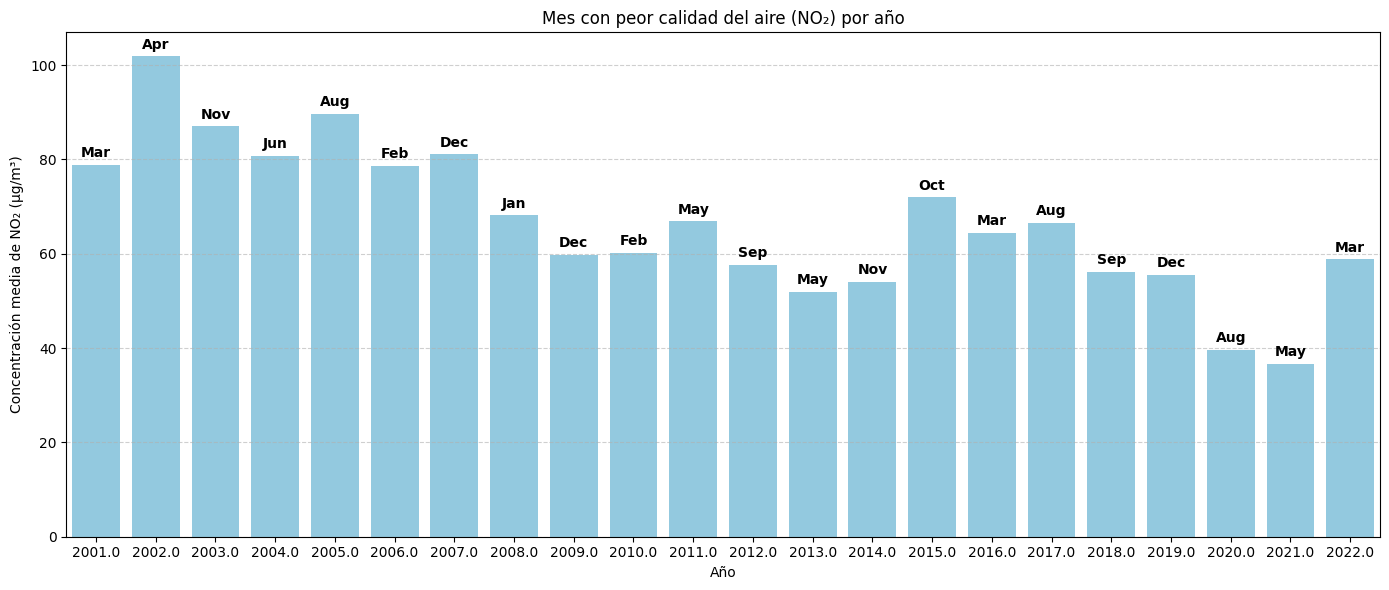

In [ ]:
# ---------- LIMPIEZA DE DATOS ----------
# Convertimos NO2 de Float a Int
df["NO2"] = pd.to_numeric(df["NO2"], errors="coerce")

# Eliminamos filas donde NO2 o date sean NaN
df = df.dropna(subset=["date", "NO2"])

# Agrupamos los datos de date por mes
df["mes"] = df["date"].dt.month

# Obtenemos la media mensual de dióxido de nitrógeno NO2
mensual_no2 = df.groupby(["año", "mes"])["NO2"].mean().reset_index()

# Obtenemos el mes con peor promedio de cada año
peor_mes_anual = mensual_no2.loc[mensual_no2.groupby("año")["NO2"].idxmax()].copy()

# Agregar el nombre del mes
peor_mes_anual["mes_nombre"] = peor_mes_anual["mes"].apply(lambda x: calendar.month_abbr[x])

# Gráfico
plt.figure(figsize=(14,6))
ax = sns.barplot(data=peor_mes_anual, x="año", y="NO2", dodge=False, color="skyblue")

# Añadir el nombre del mes encima de cada barra
for p, mes in zip(ax.patches, peor_mes_anual["mes_nombre"]):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  # posición horizontal: centro de la barra
        height + 1,                    # posición vertical: un poco arriba de la barra
        mes,                           # texto a mostrar
        ha="center",                   # centrar el texto horizontalmente
        va="bottom",                   # alinear el texto al fondo
        fontsize=10,
        fontweight="bold"
    )

plt.title("Mes con peor calidad del aire (NO₂) por año")
plt.xlabel("Año")
plt.ylabel("Concentración media de NO₂ (µg/m³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

- Distribución de O₃: ¿Cuál es el rango de concentraciones de O₃ más frecuente? (histograma global y por año).
- Mejora: Analizar la variabilidad anual y estacional de O₃.

- Picos diarios: ¿Qué día presentó la concentración más alta de PM10 en cada año?
- Mejora: Visualizar los días de picos extremos y analizar si hay patrones estacionales o de eventos puntuales.

## 🌍 David (comparaciones y correlaciones)

- Estacionalidad en un año: ¿Qué contaminante presenta mayores diferencias entre invierno y verano?
- Mejora: Analizar la estacionalidad de todos los contaminantes y visualizar la diferencia entre estaciones.

- Correlación: ¿Existe correlación entre los niveles diarios de NO₂ y CO en el periodo analizado?
- Mejora: Analizar correlaciones entre más contaminantes y visualizar la matriz de correlación.

- Laborables vs fines de semana: ¿Hay diferencias en los niveles de NO₂ promedio entre días laborables y fines de semana?
- Mejora: Analizar diferencias para más contaminantes y visualizar la variación semanal.

- Variación horaria: ¿A qué horas del día se concentran los picos de NO₂ en promedio durante el año? (curva horaria).
- Mejora: Analizar la variación horaria de más contaminantes y comparar entre años.

## 🌱 Alba (limpieza y calidad de datos)

- Valores nulos: ¿Qué porcentaje de valores faltan en cada contaminante y cómo tratarlos?
- Mejora: Visualizar la evolución de los valores nulos a lo largo del tiempo y proponer estrategias de imputación.

- Estación de medición: Este dataset solo contiene datos de la estación Escuelas Aguirre, por lo que el análisis se centra en la evolución temporal y no espacial.
- Mejora: Proponer la comparación con otros datasets de estaciones si estuvieran disponibles.

- Comparación mensual: ¿Cómo evolucionó la concentración de PM10 a lo largo de los meses? (línea mensual agregada por año).
- Mejora: Visualizar la tendencia mensual agregada y comparar entre años.

- Contaminante predominante: ¿Cuál fue el contaminante con mayor concentración media anual?
- Mejora: Visualizar el contaminante predominante por año y analizar cambios en el tiempo.